<a href="https://colab.research.google.com/github/Jonny-T87/Dojo-Projects/blob/main/NBATrends_Project_2_Part_3_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project 2 - NBA Dataset

Jonny Tesfahun

- 07/14/22

1. Source of data

 - https://www.kaggle.com/datasets/nathanlauga/nba-games?select=ranking.csv

 - using games.csv file 

2. Brief description of data

 - The data is a collection of NBA games data from the 2004 season to dec 2020 season. The file contains all games home and away data. Some of these include home points, away points, FG percent home & away, FT percent home & away.
 
3. What is the target?
 - My target for this dataset would be Home_Team_Wins

4. Is this a classification or regression problem?
 - This is a regression problem. I hope to be using linear regression.

5. How many features?
 - There will be 7 features. They include Pts_home, Fg_pct_home, Fg3_pct_home, Ast_home, Reb_home, Pts_away, and Fg_pct_away. 

6. How many rows of data.
 - As many needed for the machine to learn and better predict.

7. What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
 - The first challenge may be that there might not be the strongest correlation between target and features. The second would be understanding how to evaluate a percentage as a prediction.


##Dataset: Cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
#NBA dataset loading
df = pd.read_csv('/content/drive/MyDrive/DojoBootCamp/Project Files/games.csv')
df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,23.0,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0
1,2022-03-12,22101006,Final,1610612741,1610612739,2021,1610612741,101.0,0.443,0.933,...,20.0,46.0,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1
2,2022-03-12,22101007,Final,1610612759,1610612754,2021,1610612759,108.0,0.412,0.813,...,28.0,52.0,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0
3,2022-03-12,22101008,Final,1610612744,1610612749,2021,1610612744,122.0,0.484,0.933,...,33.0,55.0,1610612749,109.0,0.413,0.696,0.386,27.0,39.0,1
4,2022-03-12,22101009,Final,1610612743,1610612761,2021,1610612743,115.0,0.551,0.750,...,32.0,39.0,1610612761,127.0,0.471,0.760,0.387,28.0,50.0,0


In [4]:
#Checking dataset infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25796 entries, 0 to 25795
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     25796 non-null  object 
 1   GAME_ID           25796 non-null  int64  
 2   GAME_STATUS_TEXT  25796 non-null  object 
 3   HOME_TEAM_ID      25796 non-null  int64  
 4   VISITOR_TEAM_ID   25796 non-null  int64  
 5   SEASON            25796 non-null  int64  
 6   TEAM_ID_home      25796 non-null  int64  
 7   PTS_home          25697 non-null  float64
 8   FG_PCT_home       25697 non-null  float64
 9   FT_PCT_home       25697 non-null  float64
 10  FG3_PCT_home      25697 non-null  float64
 11  AST_home          25697 non-null  float64
 12  REB_home          25697 non-null  float64
 13  TEAM_ID_away      25796 non-null  int64  
 14  PTS_away          25697 non-null  float64
 15  FG_PCT_away       25697 non-null  float64
 16  FT_PCT_away       25697 non-null  float6

In [5]:
#checking what correlation is for target and features
df.corr()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
GAME_ID,1.000000,-0.026348,-0.031471,0.095721,-0.026348,0.033727,0.018384,0.036256,-0.004041,-0.032486,-0.006294,-0.031471,0.004002,0.005716,0.033366,-0.002642,-0.042501,-0.024355,0.030402
HOME_TEAM_ID,-0.026348,1.000000,-0.045911,0.000461,1.000000,-0.024372,-0.008239,-0.009983,0.002748,-0.097061,-0.026674,-0.045911,-0.006496,0.022197,0.016042,0.015525,-0.066744,-0.025784,-0.023604
VISITOR_TEAM_ID,-0.031471,-0.045911,1.000000,0.002195,-0.045911,-0.000120,0.035072,0.004108,0.017292,0.018287,-0.002759,1.000000,-0.032583,-0.026651,-0.018476,-0.022625,-0.013180,-0.010262,0.030571
SEASON,0.095721,0.000461,0.002195,1.000000,0.000461,0.345022,0.039355,0.065950,0.024126,0.192337,0.162529,0.002195,0.378888,0.073299,0.066808,0.020564,0.255330,0.199832,-0.028197
TEAM_ID_home,-0.026348,1.000000,-0.045911,0.000461,1.000000,-0.024372,-0.008239,-0.009983,0.002748,-0.097061,-0.026674,-0.045911,-0.006496,0.022197,0.016042,0.015525,-0.066744,-0.025784,-0.023604
PTS_home,0.033727,-0.024372,-0.000120,0.345022,-0.024372,1.000000,0.661964,0.184323,0.423277,0.601088,0.163020,-0.000120,0.483321,0.128207,0.069504,0.057260,0.208445,-0.139219,0.398901
FG_PCT_home,0.018384,-0.008239,0.035072,0.039355,-0.008239,0.661964,1.000000,0.018565,0.449595,0.549268,-0.188445,0.035072,0.114863,0.039905,0.030386,0.014223,0.013061,-0.464576,0.433626
FT_PCT_home,0.036256,-0.009983,0.004108,0.065950,-0.009983,0.184323,0.018565,1.000000,0.028656,0.018711,-0.052373,0.004108,0.075251,0.046824,0.036861,0.021528,0.029812,-0.115124,0.092710
FG3_PCT_home,-0.004041,0.002748,0.017292,0.024126,0.002748,0.423277,0.449595,0.028656,1.000000,0.351811,-0.087723,0.017292,0.046740,0.008265,0.015199,-0.001993,-0.002371,-0.201855,0.300804
AST_home,-0.032486,-0.097061,0.018287,0.192337,-0.097061,0.601088,0.549268,0.018711,0.351811,1.000000,0.066332,0.018287,0.183636,0.006043,0.026035,-0.006692,0.142278,-0.108505,0.303889


In [6]:
#looking to see what to drop based on unique data, that will not help model
df.nunique()

GAME_DATE_EST        4149
GAME_ID             25767
GAME_STATUS_TEXT        1
HOME_TEAM_ID           30
VISITOR_TEAM_ID        30
SEASON                 19
TEAM_ID_home           30
PTS_home              100
FG_PCT_home           399
FT_PCT_home           403
FG3_PCT_home          427
AST_home               42
REB_home               55
TEAM_ID_away           30
PTS_away              106
FG_PCT_away           390
FT_PCT_away           380
FG3_PCT_away          409
AST_away               41
REB_away               52
HOME_TEAM_WINS          2
dtype: int64

In [7]:
#checking for duplicates 
df.duplicated().sum()

0

In [8]:
#Checking for NaN in target or features
df.isna().sum()

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64

In [9]:
#the target data looks nicely balanced
df['HOME_TEAM_WINS'].value_counts()

1    15155
0    10641
Name: HOME_TEAM_WINS, dtype: int64

In [10]:
#Looking for outliers in target and features, 
#Some crazy numbers like 50 ASt_home, 168 Pts home, and 72 Reb home but nothing unbelievable. Since it is team sport. 
df.describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,2.579600e+04,2.579600e+04,2.579600e+04,25796.000000,2.579600e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.579600e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25796.000000
mean,2.169208e+07,1.610613e+09,1.610613e+09,2011.798341,1.610613e+09,103.106044,0.460313,0.759705,0.355896,22.736779,43.345799,1.610613e+09,100.294120,0.449265,0.758082,0.349413,21.403899,42.085146,0.587494
std,5.496041e+06,8.638857e+00,8.654846e+00,5.397985,8.638857e+00,13.174726,0.056629,0.100692,0.111940,5.177566,6.621832,8.654846e+00,13.343016,0.055528,0.103418,0.110194,5.140897,6.526951,0.492295
min,1.030000e+07,1.610613e+09,1.610613e+09,2003.000000,1.610613e+09,36.000000,0.250000,0.143000,0.000000,6.000000,15.000000,1.610613e+09,33.000000,0.244000,0.143000,0.000000,4.000000,19.000000,0.000000
25%,2.060109e+07,1.610613e+09,1.610613e+09,2007.000000,1.610613e+09,94.000000,0.421000,0.696000,0.286000,19.000000,39.000000,1.610613e+09,91.000000,0.412000,0.692000,0.278000,18.000000,38.000000,0.000000
50%,2.120040e+07,1.610613e+09,1.610613e+09,2012.000000,1.610613e+09,103.000000,0.459000,0.765000,0.355000,23.000000,43.000000,1.610613e+09,100.000000,0.448000,0.765000,0.350000,21.000000,42.000000,1.000000
75%,2.170070e+07,1.610613e+09,1.610613e+09,2016.000000,1.610613e+09,112.000000,0.500000,0.829000,0.429000,26.000000,48.000000,1.610613e+09,109.000000,0.487000,0.833000,0.420000,25.000000,46.000000,1.000000
max,5.200021e+07,1.610613e+09,1.610613e+09,2021.000000,1.610613e+09,168.000000,0.684000,1.000000,1.000000,50.000000,72.000000,1.610613e+09,168.000000,0.687000,1.000000,1.000000,46.000000,81.000000,1.000000


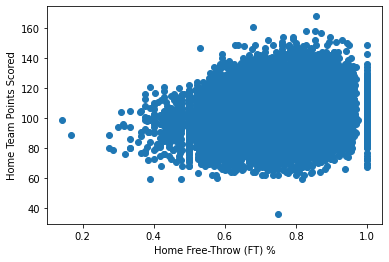

In [11]:
#A univariate visuals of Home team points based on FT %
plt.scatter(df['FT_PCT_home'], df['PTS_home'])
plt.xlabel('Home Free-Throw (FT) %')
plt.ylabel('Home Team Points Scored');

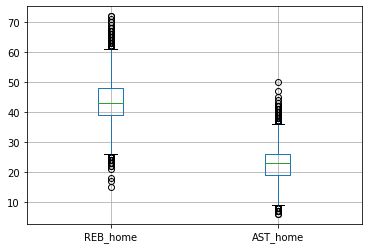

In [12]:
#Boxplot of home rebounds and home assists
boxplot = df.boxplot(column= ['REB_home', 'AST_home']);

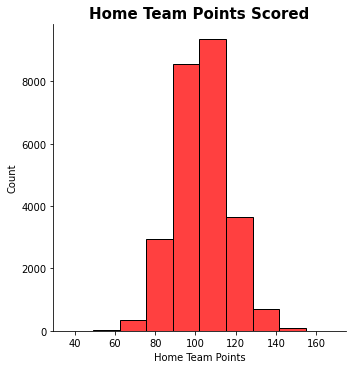

In [13]:
#seaborn displot of amount Home Team Points 
sns.displot(df['PTS_home'], kde=False, bins=10, color='red')
plt.xlabel('Home Team Points')
plt.title('Home Team Points Scored', fontsize = 15, fontweight = 'bold');

In [14]:
# Drop unnecessary columns
df = df.drop(columns= ['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'TEAM_ID_home', 'TEAM_ID_away',
                  'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away'])


In [15]:
#checking columns are dropped, looks great
df.head()

,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,HOME_TEAM_WINS
0,2021,104.0,0.398,0.760,0.333,23.0,53.0,113.0,0
1,2021,101.0,0.443,0.933,0.429,20.0,46.0,91.0,1
2,2021,108.0,0.412,0.813,0.324,28.0,52.0,119.0,0
3,2021,122.0,0.484,0.933,0.400,33.0,55.0,109.0,1
4,2021,115.0,0.551,0.750,0.407,32.0,39.0,127.0,0


##Part 3:

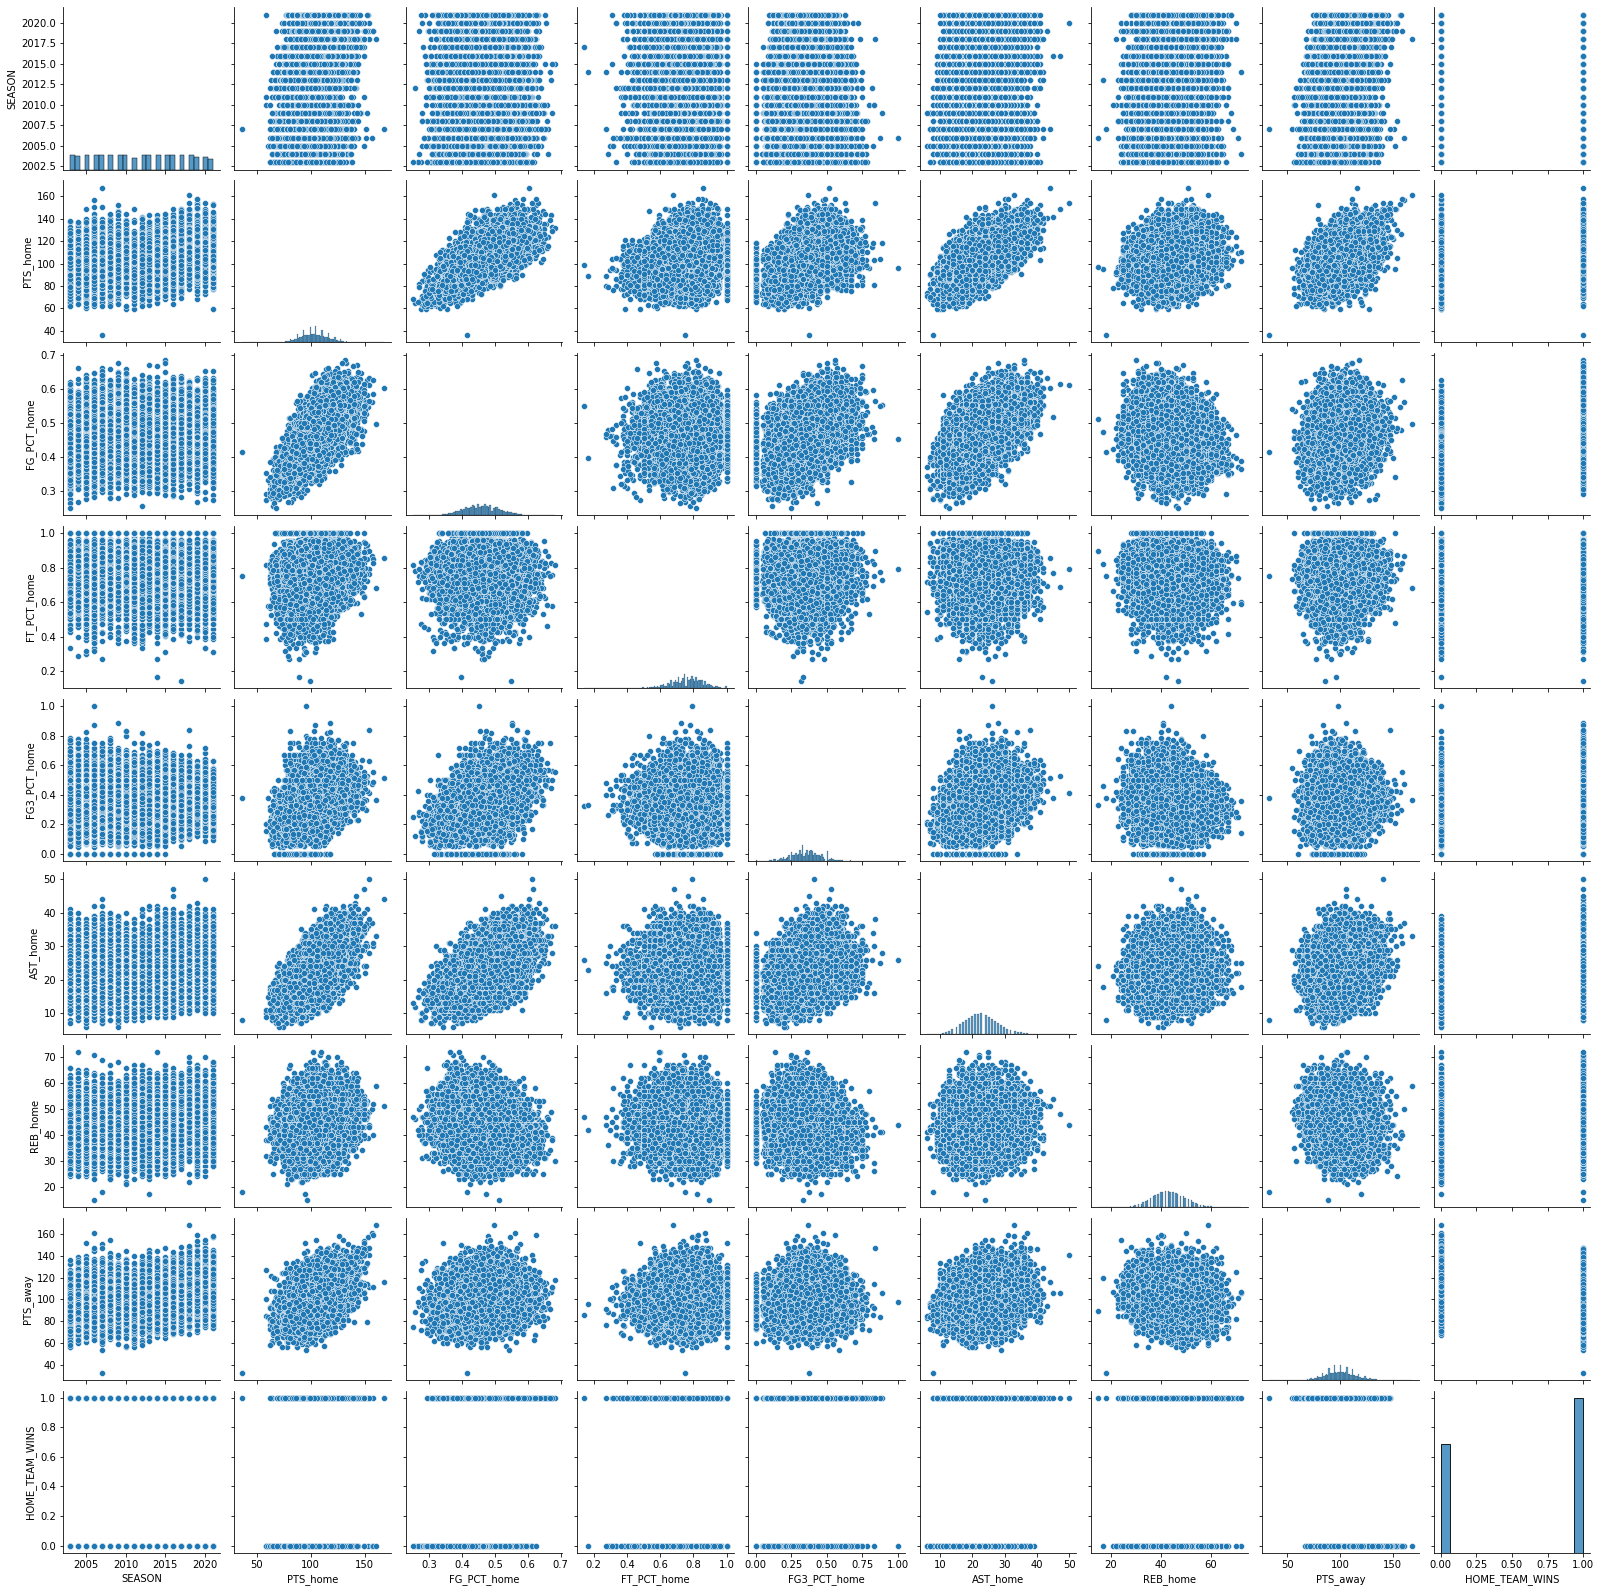

In [16]:
#seaborn pairplot of target and features
sns.pairplot(df)

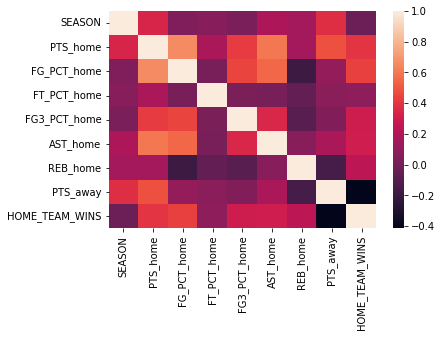

In [17]:
#Taking a look at correlation using seaborn heatmap
sns.heatmap(df.corr())

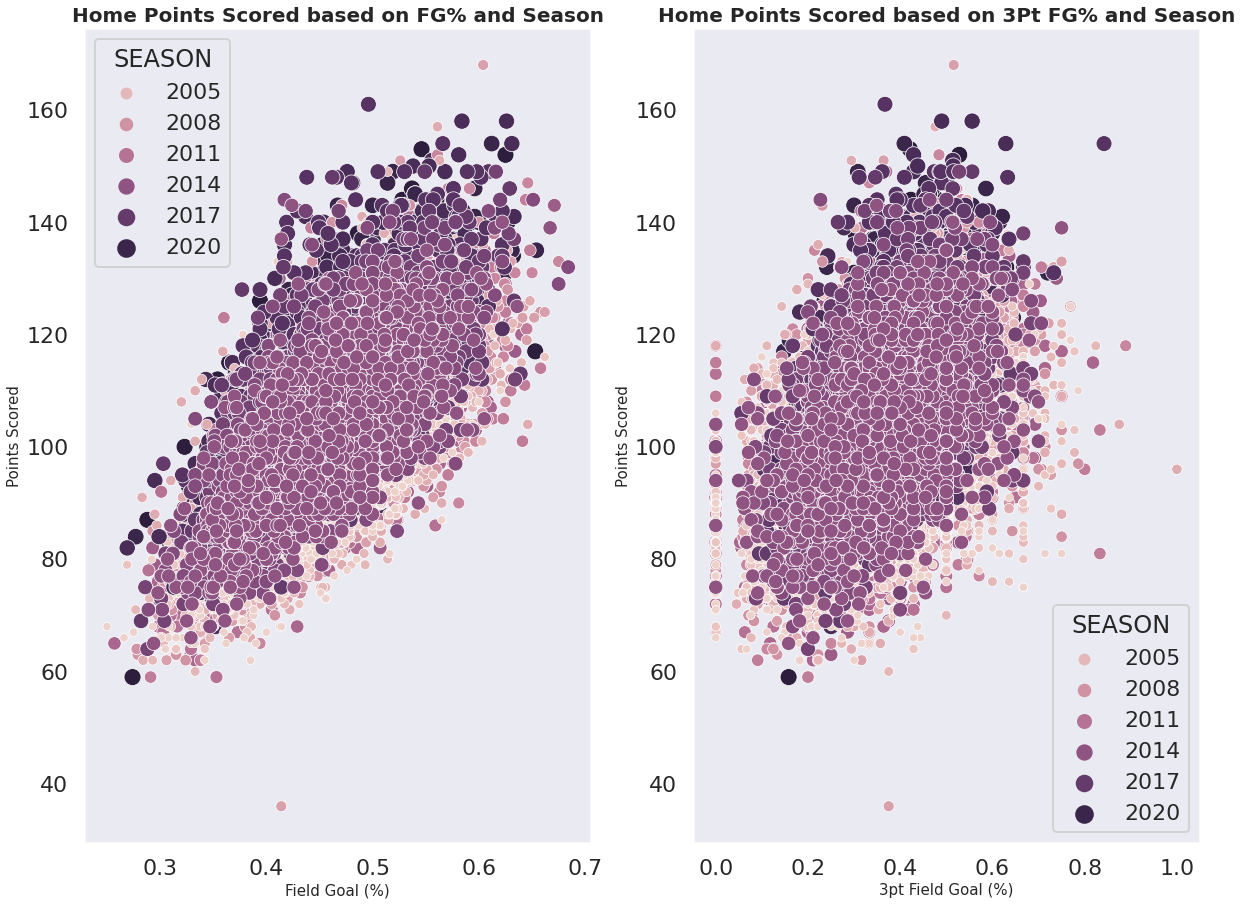

In [101]:
#Presentation #1 - FG and FG3pt correlation
fig, axes = plt.subplots(ncols=2, figsize=(20,15))
sns.set_style("dark")
sns.scatterplot(data=df, x='FG_PCT_home', y='PTS_home', hue='SEASON', size='SEASON', ax=axes[0])
axes[0].set_title('Home Points Scored based on FG% and Season', fontsize = 20, fontweight = 'bold')
axes[0].set_xlabel('Field Goal (%)', fontsize = 15)
axes[0].set_ylabel('Points Scored', fontsize = 15)
plt.legend(title='Season (Yr)', bbox_to_anchor=(1.02, 1))

sns.scatterplot(data=df, x='FG3_PCT_home', y='PTS_home', hue='SEASON', size='SEASON', ax=axes[1])
axes[1].set_title('Home Points Scored based on 3Pt FG% and Season', fontsize = 20, fontweight = 'bold')
axes[1].set_xlabel('3pt Field Goal (%)', fontsize = 15)
axes[1].set_ylabel('Points Scored', fontsize = 15)

plt.tight_layout;

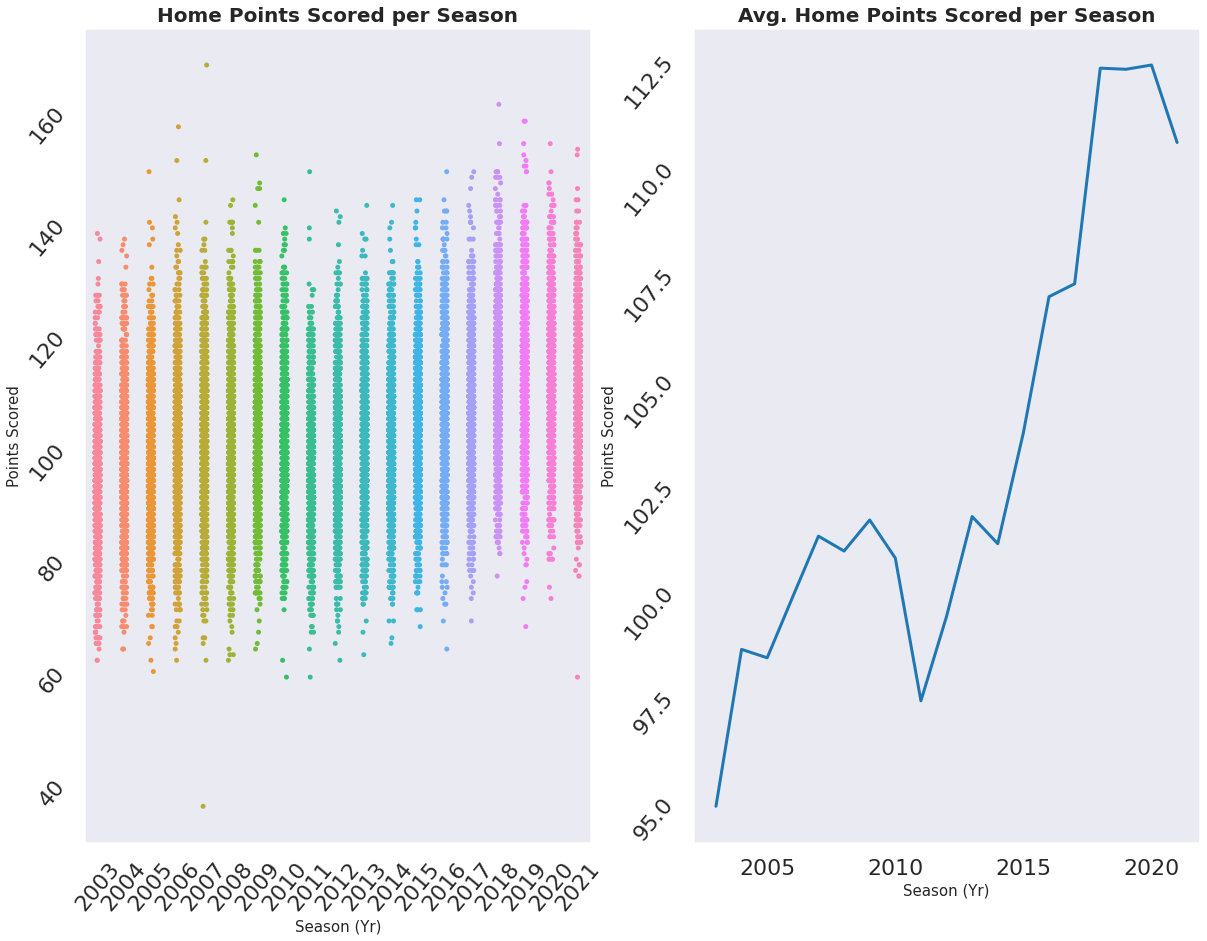

In [92]:
#Presentation #2 - Points and Avg. Points per Season Increase
fig, axes = plt.subplots(ncols=2, figsize=(20,15))
for ax in fig.axes:
    ax.tick_params(labelrotation=50)
#source for tick_param = https://stackoverflow.com/questions/19273040/rotating-axis-text-for-each-subplot

sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 5})
sns.stripplot(x="SEASON", y="PTS_home", data=df, ax=axes[0])
axes[0].set_xlabel('Season (Yr)', fontsize = 15)
axes[0].set_ylabel('Points Scored', fontsize = 15)
axes[0].set_title('Home Points Scored per Season',  fontsize = 20, fontweight='bold')

df.groupby('SEASON')['PTS_home'].mean().plot()
axes[1].set_title('Avg. Home Points Scored per Season', fontsize = 20, fontweight='bold')
axes[1].set_xlabel('Season (Yr)', fontsize = 15)
axes[1].set_ylabel('Points Scored', fontsize = 15)

plt.tight_layout;

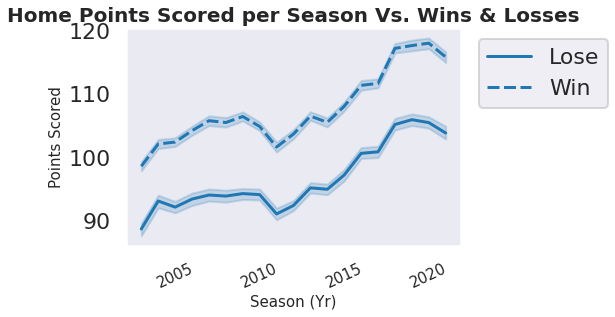

In [118]:
##Presentation #3 - Home Points and Win Lose Synergy
sns.axes_style("darkgrid")
sns.lineplot(data=df, x="SEASON", y="PTS_home", style="HOME_TEAM_WINS")
plt.xticks(rotation = 80, fontsize = 12)
plt.xlabel('Season (Yr)', fontsize = 15)
plt.xticks(rotation = 25, fontsize = 15)
plt.ylabel('Points Scored', fontsize = 15)
plt.title('Home Points Scored per Season Vs. Wins & Losses',  fontsize = 20, fontweight='bold')
plt.legend(labels=['Lose','Win'],
           bbox_to_anchor=(1.02, 1))
plt.tight_layout;

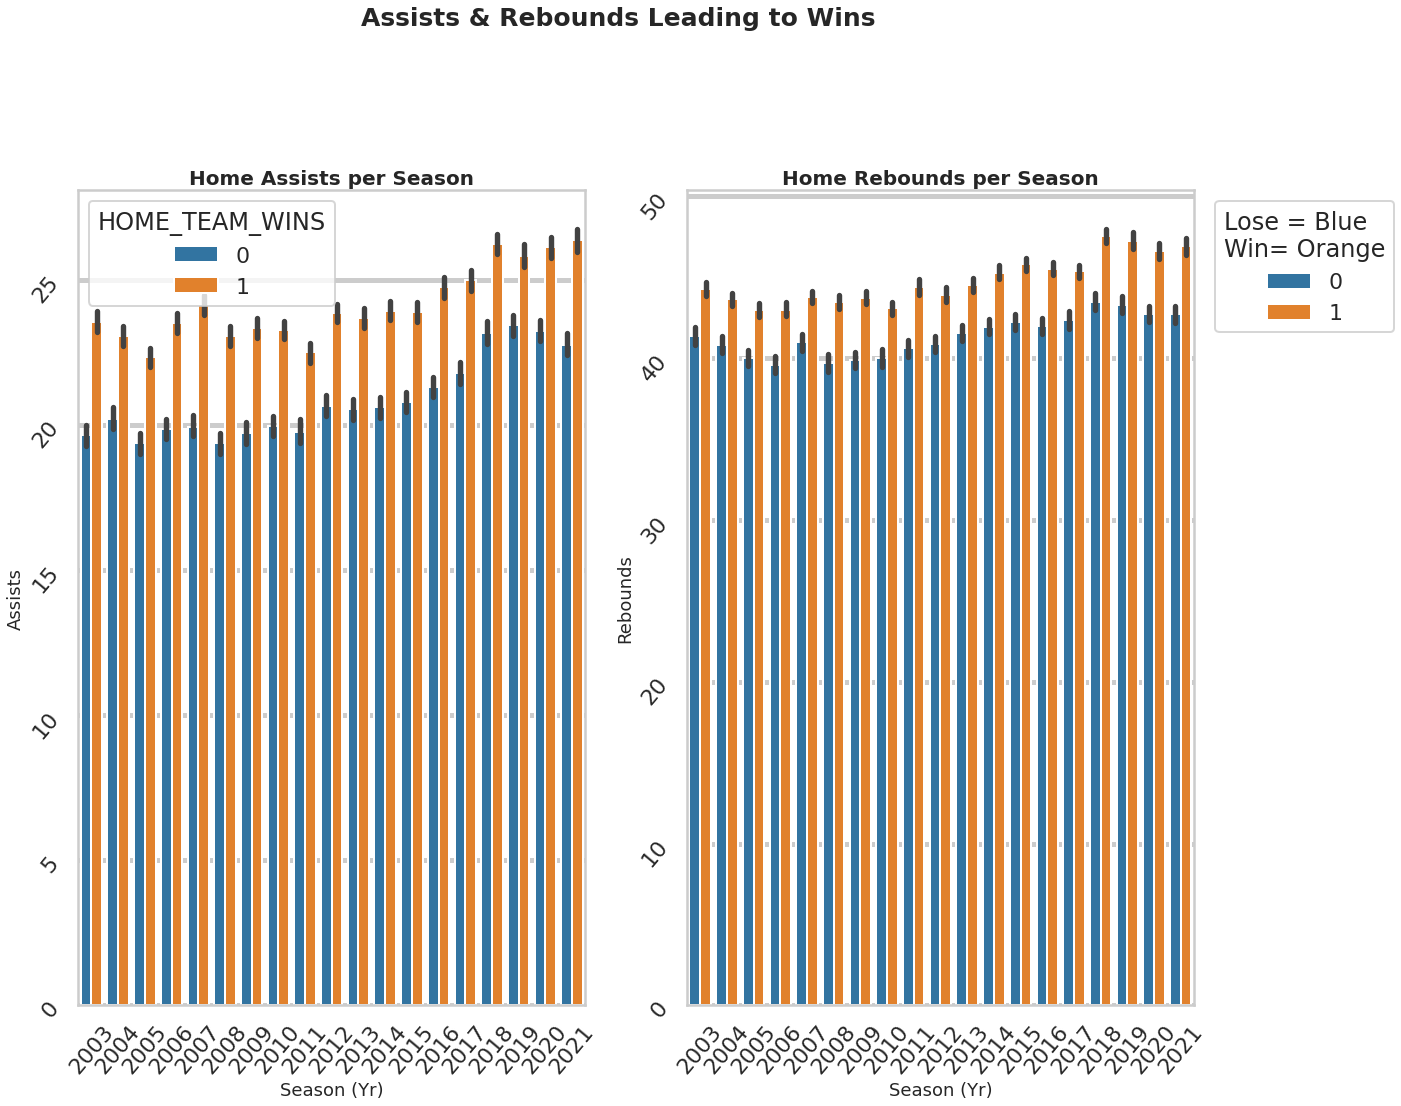

In [223]:
#Presentation #4 - Ast. Reb. Leading to Wins
sns.set_style("whitegrid")
fig, axes = plt.subplots(ncols=2, figsize=(20,15))
for ax in fig.axes:
    ax.tick_params(labelrotation=50)

sns.barplot(x="SEASON", y="AST_home", hue="HOME_TEAM_WINS", data=df, ax=axes[0])
axes[0].set_xlabel('Season (Yr)', fontsize = 18)
axes[0].set_ylabel('Assists', fontsize = 18)
axes[0].set_title('Home Assists per Season',  fontsize = 20, fontweight='bold')
plt.legend(title='Home Team Wins', labels=['Lose','Win'], bbox_to_anchor=(1.02, 1))

sns.barplot(x="SEASON", y="REB_home", hue="HOME_TEAM_WINS", data=df, ax=axes[1])
axes[1].set_xlabel('Season (Yr)', fontsize = 18)
axes[1].set_ylabel('Rebounds', fontsize = 18)
axes[1].set_title('Home Rebounds per Season',  fontsize = 20, fontweight='bold')
plt.title("Home Rebounds per Season", fontsize = 20, fontweight='bold')

plt.legend(title='Lose = Blue \nWin= Orange', bbox_to_anchor=(1.02, 1))
fig.suptitle('Assists & Rebounds Leading to Wins', fontsize = 25, fontweight = 'bold', y=1.05);
plt.tight_layout;